# **<center> Solution Manual For Tutors </center>** 

# <center><strong>Important:</strong> Make a Copy of this Google Colab Notebook!
</center>

<p>Please refrain from using or modifying this current Google Colab notebook directly. Instead, follow these instructions to create your own copy:</p>

<ol>
  <li>Go to the "File" menu at the top of the Colab interface.</li>
  <li>Select "Save a copy in Drive" to create a duplicate of this notebook.</li>
  <li>You can now work on your own copy without affecting the original.</li>
</ol>

<p>This ensures that you have a personalized version to work on and make changes according to your needs. Remember to save your progress as you go. Enjoy working on your own copy of the Google Colab notebook!</p>


# **Module 14: Visualization of Singular Values and Singular Vectors**
We will now explore the meaning of singular values and vectors in image compression following [this tutorial](https://scicoding.com/pca-using-python-image-compression/). We will use the sklearn PCA function for this module. However, feel free to use your custom function instead. <p>

This practice is divided into 4 Parts, with the last being optional. <p>

<ul><li> Part 1: Compress a single gray scale image using PCA </li>
<li> Part 2: How any principal components are needed to efficiently compress the image? </li>
<li> Part 3:  Singular Vectors and Principal Components </li>
<li> [OPTIONAL] Part 4: Image Compression Unsing PCA of an image data set </li> </ul>

<i>Note: Depending on your previous experience with Python and familiarity with PCA, Parts 1-3 may feel relatively straightforward. As a result, we have included an optional Part 4 to provide an additional challenge. If you are new to these concepts or prefer to focus on Parts 1-3, skip Part 4.  </i> <p>

## **Getting Started** 

Run the provided code sections and follow the instructions. Implement your own code were indicated. 

## **Importing Python Packages**
The first step is to import your necessary Python packages. <p>


In [ ]:
import numpy as np # Importing the numpy library as np - this is a common practice for Python coding
import matplotlib.pyplot as plt # Importing the matplotlib.pyplot as plt - useful for visualizing data  
import pandas as pd # libary for data management
import seaborn as sb # library for visualization

import skimage # for image conversion
from google.colab import files # upload files from local drive

from sklearn.decomposition import PCA # for PCA

For learning purposes will use the image from the tutorial, later on, you can choose your own image. To do so, download [this image](https://drive.google.com/file/d/1qYL44GQYbjJyaxL9rBO2hPSEB-BSpATx/view?usp=sharing) to your local machine. Next, execute the following code section. When you run this code, it will prompt you to select files from your computer. Choose the image you just downloaded, and it will be transferred to the current working directory in the Colab environment.

In [ ]:
uploaded = files.upload()  # Upload the image file

Saving waters.jpg to waters.jpg


In [ ]:
# Get the first uploaded file (assuming only one file was uploaded)
file_name = next(iter(uploaded))

image = skimage.io.imread(file_name) # Load the image

image = skimage.color.rgb2gray(image) # Convert to grayscale

*Note: To perform Principal Component Analysis (PCA) on a grayscale image, you typically need to convert the image into a 1D vector. PCA operates on a 2D matrix where each row is a sample (an image, in this case) and each column is a feature (a pixel value, in this case).* 

## Part 1: Compress a single gray scale **image** using PCA
We will now explore how to compress an image using PCA using tthe built-in function, but feel free to use your own PCA function instead.  

In [ ]:
# Perform Principal Component Analysis (PCA) with 50 components
pca = PCA(n_components=50)  # select number of components
image_compressed = pca.fit_transform(image)  # perform PCA on the image data

# Reconstruct the image from the compressed representation
image_decompressed = pca.inverse_transform(image_compressed)

# Plot images
fig, axes = plt.subplots(1, 2, figsize=(100, 100))
axes[0].imshow(image, cmap='gray')
axes[0].set_label("Original image")  # set label for the original image plot
axes[1].imshow(image_decompressed, cmap='gray')
axes[1].set_label("Compressed image")  # set label for the compressed image plot

Output hidden; open in https://colab.research.google.com to view.

<strong>Task:</strong> Explain the difference between the two images. Play around using a different number of principal components. How does this change the resulting image? 

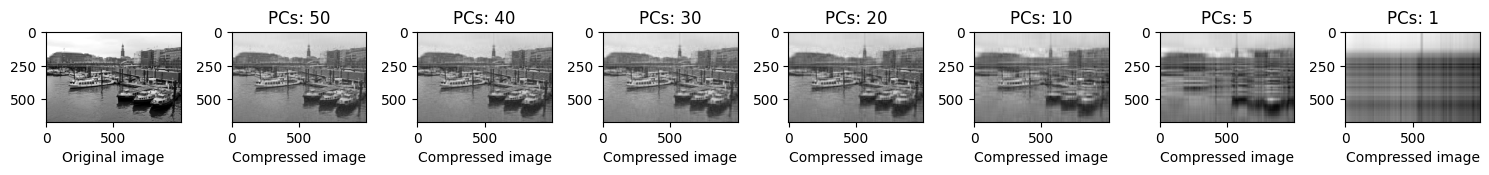

In [ ]:
# Perform Principal Component Analysis (PCA) with different numbers of components
n_components = [50, 40, 30, 20, 10, 5, 1]
fig, axes = plt.subplots(1, len(n_components) + 1, figsize=(15, 5))

# Plot the original image
axes[0].imshow(image, cmap='gray')
axes[0].set_xlabel("Original image")

for i, n_comp in enumerate(n_components):
    # Perform PCA with the current number of components
    pca = PCA(n_components=n_comp)
    image_compressed = pca.fit_transform(image)
    image_decompressed = pca.inverse_transform(image_compressed)

    # Plot the compressed image in the corresponding subplot
    axes[i+1].imshow(image_decompressed, cmap='gray')
    axes[i+1].set_xlabel("Compressed image")
    axes[i+1].set_title("PCs: {}".format(n_comp))

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()

## Part 2: How any principal components are needed to efficiently compress the image?
<strong>Task</strong>: Think about the following questions:
<ul><li> What do the principal components represent in the context of image compression?
<li>How can we interpret the principal components visually? Do they capture specific image features or patterns?
<li>Are the principal components directly related to image content or do they represent more abstract features? 

<h3>Answers:</h3>
<ol>
  <li><strong>What do the principal components represent in the context of image compression?</strong><br>italicized text
    Principal components represent the directions or axes in the image space along which the data varies the most. They capture the most significant patterns or features present in the image data.
  </li>
  <li><strong>How can we interpret the principal components visually? Do they capture specific image features or patterns?</strong><br>
    Principal components can be interpreted visually by examining the singular vectors associated with them. Each principal component represents a combination of image features or patterns. The components with larger singular values capture more pronounced or dominant features, while those with smaller singular values capture subtler or less significant patterns.
  </li>
  <li><strong>Are the principal components directly related to image content or do they represent more abstract features?</strong><br>
    The principal components can represent both specific image content and more abstract features. In some cases, a principal component may correspond to a recognizable object or texture in the image. However, other components may represent more abstract features that are not directly linked to specific objects but capture more global variations or structures in the image.
  </li>
</ol>

## Part 3: Singular Vectors and Principal Components
In this step, we will explore the singular values and principal components.

<ul><li><strong>Singular values</strong> (in PCA, also known as the square roots of eigenvalues of the covariance matrix) represent the importance of each principal component in capturing the variance in the data. A larger singular value for a principal component means that component represents a direction in feature space along which there's more variance in the data.

<li><strong>Principal components </strong> (eigenvectors of the covariance matrix) represent directions in the feature space along which the data varies the most. They are orthogonal to each other, meaning that they capture non-redundant information in the data. In the transformed space, each data point's coordinates are its projections onto the principal components, indicating how much the data point varies along each of those directions.</ul>

This is why PCA is often used for dimensionality reduction: by keeping only the first few principal components (those associated with the largest singular values), we can capture the majority of the variance in the data with fewer dimensions.

Plot the singular values.

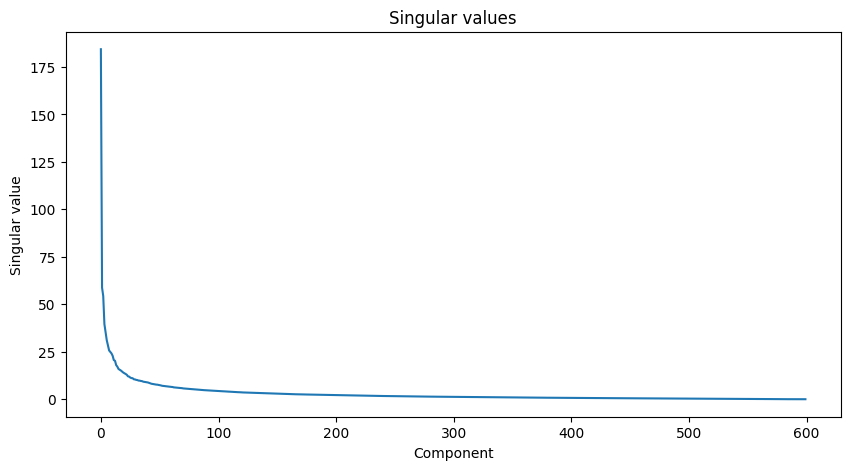

In [ ]:
# Perform Principal Component Analysis (PCA) with 600 components
num_components = 600  # select number of components (original image size is 667x1000)
pca = PCA(n_components=num_components) 
image_compressed = pca.fit_transform(image)

# Plot the singular values
plt.figure(figsize=(10, 5))
plt.plot(pca.singular_values_)
plt.title("Singular values")
plt.xlabel("Component")
plt.ylabel("Singular value")
plt.show()

Let's see how much variance the first principal components explain. 

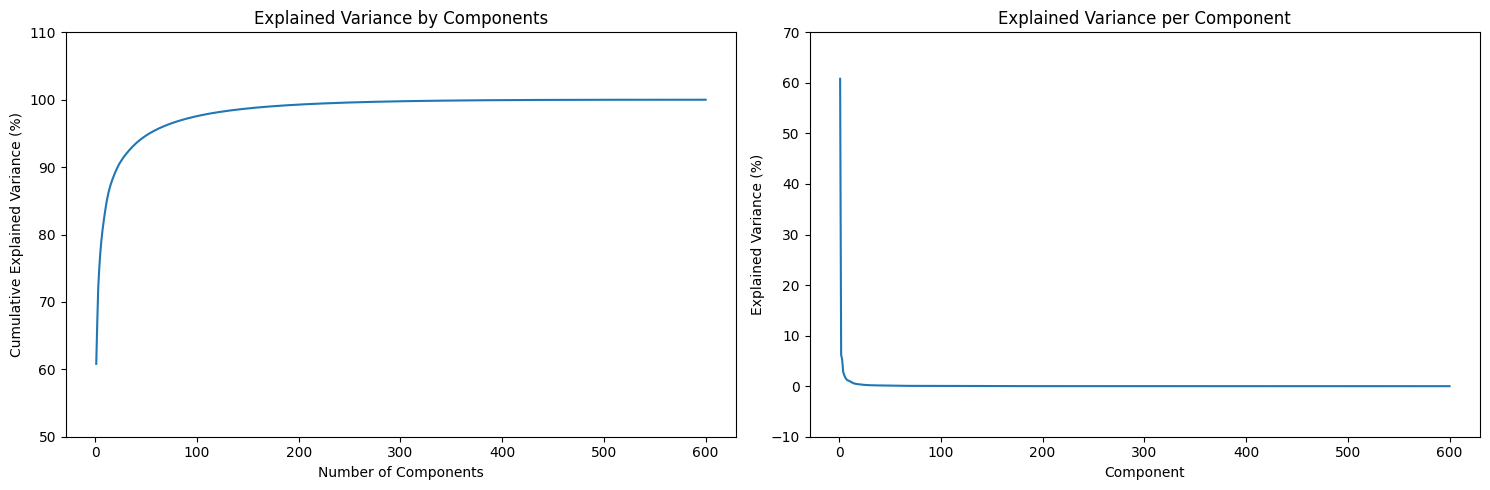

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot cumulative explained variance
axes[0].plot(range(1, num_components+1), 100 * np.cumsum(pca.explained_variance_ratio_))
axes[0].set_xlabel('Number of Components')
axes[0].set_ylabel('Cumulative Explained Variance (%)')
axes[0].set_title('Explained Variance by Components')

# Plot explained variance per component
axes[1].plot(range(1, num_components+1), 100 * pca.explained_variance_ratio_)
axes[1].set_xlabel('Component')
axes[1].set_ylabel('Explained Variance (%)')
axes[1].set_title('Explained Variance per Component')

# Set y-axis limits
axes[0].set_ylim(50, 110)
axes[1].set_ylim(-10, 70)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Let's look at the data table.

In [ ]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_) * 100

# Create a DataFrame
explained_variance = pd.DataFrame({
    'Component': range(1, len(cumulative_explained_variance) + 1),
    'Explained Variance (%)': cumulative_explained_variance.round(2)
})

# Display the DataFrame
print(explained_variance.head(10)) # display first 10 rows

   Component  Explained Variance (%)
0          1                   60.81
1          2                   66.99
2          3                   72.28
3          4                   75.08
4          5                   77.29
5          6                   79.02
6          7                   80.45
7          8                   81.63
8          9                   82.74
9         10                   83.78


Plot a selection of principal components. 

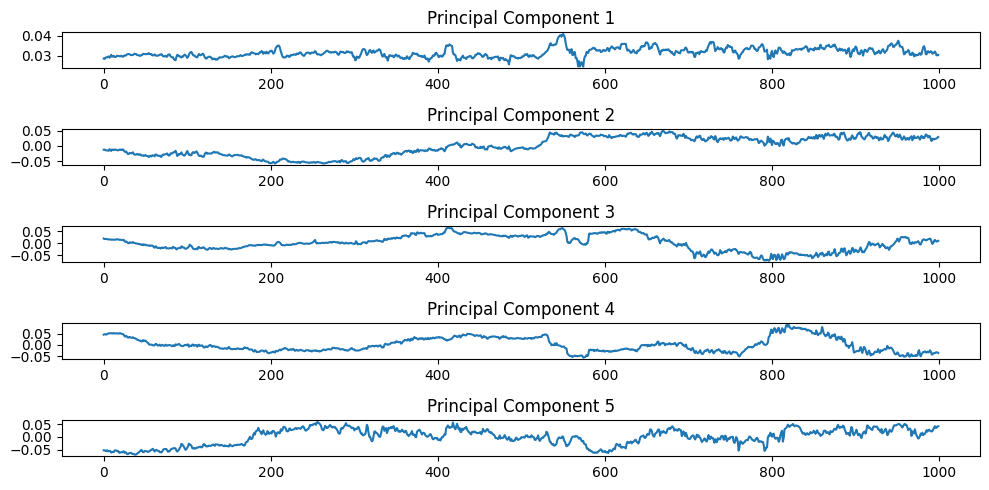

In [ ]:
# Get the eigenvectors (principal components)
principal_components = pca.components_

# Plot the first few eigenvectors
n_vectors = 5  # Number of vectors to plot
fig, axes = plt.subplots(n_vectors, 1, figsize=(10, 5))
for i in range(n_vectors):
    ax = axes[i]
    ax.plot(principal_components[i])
    ax.set_title("Principal Component {}".format(i+1))
plt.tight_layout()
plt.show()

###<strong> How to interpret the plots of the eigenvectors / principal components? </strong>

When you apply PCA to a single image, each row of pixels in the image is considered a sample, and each pixel in that row is treated as a feature. So, if you plot the principal components, each point on the line represents the weight or "loading" of a specific pixel (feature) in the principal component.

Here's how you interpret these plots in your context:

<ul>
    <li><strong>Magnitude:</strong> A larger absolute value of the weight indicates that the intensity of a specific pixel has a larger influence on the principal component. This pixel is a key characteristic that distinguishes this component from others.</li>
    <li><strong>Direction:</strong> A positive or negative sign indicates if a pixel's intensity positively or negatively influences the principal component. If two pixels have the same sign, their intensities tend to increase or decrease together in the direction of the principal component.</li>
    <li><strong>Pattern:</strong> A flat line indicates that all pixels contribute equally to this principal component, suggesting that this component represents the general brightness of the image. Peaks indicate that certain pixels contribute significantly to this component, suggesting that this component represents a specific pattern in the image.</li>
</ul>
The first few components often capture large-scale variations in pixel intensities, and later components may capture more subtle patterns or noise. Interpreting these components can be challenging, especially when the original image has complex patterns. However, visualizing the components can often give you an intuitive sense of the patterns that PCA has detected in the image.



Now, let's plot the principal components as a heat map.

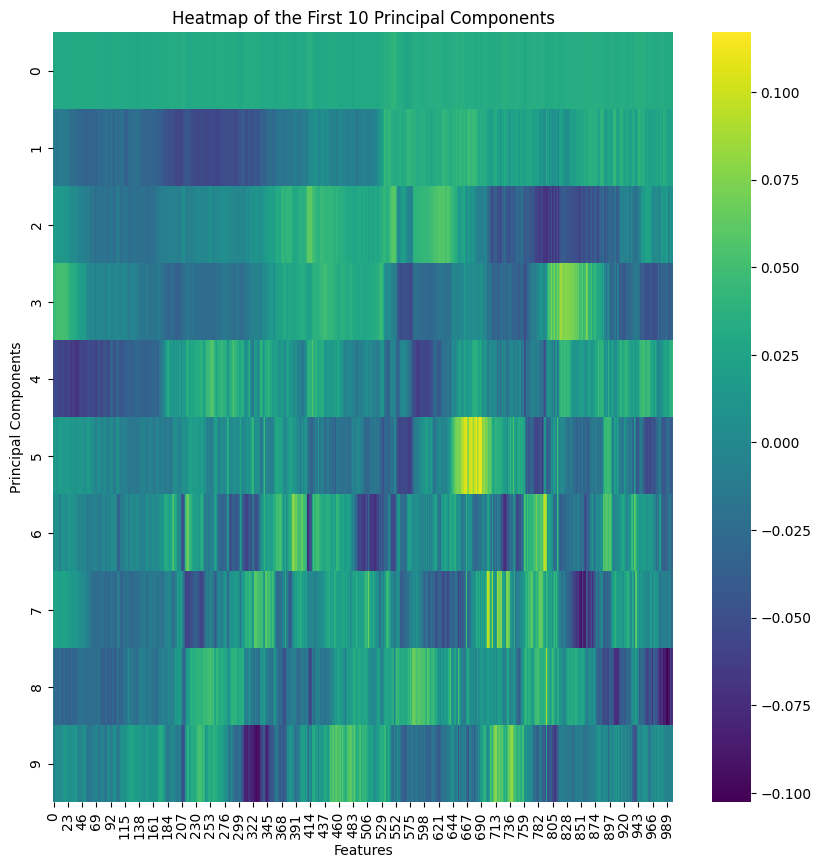

In [ ]:
import seaborn as sns

# Let's take the first 10 components
n_vectors = 10
principal_components_subset = principal_components[:n_vectors, :]

plt.figure(figsize=(10, 10))
sns.heatmap(principal_components_subset, cmap='viridis')
plt.title('Heatmap of the First 10 Principal Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

###<strong>Explanation of heatmap </strong>

 When applying Principal Component Analysis (PCA) to a grayscale image, you treat each row as a sample and each pixel in that row as a feature. The principal components derived from PCA are vectors in the feature space, and visualizing them as a heatmap helps understand the contribution of each pixel to these components.

In the heatmap, each column represents a pixel (feature) in the image, and the color in a column indicates how much that pixel contributes to each principal component. Consistent colors across components mean the pixel has a similar contribution to all of them. Each row corresponds to a principal component, and the color in a row shows how much each pixel contributes to that component. Intense colors in a row indicate that only a few pixels significantly contribute to that component.

The color scale in the heatmap represents the weights of the pixels. Darker colors (towards yellow) indicate higher absolute weights, meaning those pixels are more important in defining the corresponding principal component. The sign (positive or negative) of the weight indicates the direction of influence.

For example, a brightly colored cell corresponding to the 3rd component and the 500th pixel means that the 500th pixel in the image has a high weight in the 3rd principal component. Changing the intensity of this pixel would significantly alter the value of the 3rd component.

Keep in mind that interpreting the heatmap can be challenging, especially for complex image patterns. However, it provides a way to visually understand the structure in your high-dimensional image data.

###<strong>Compression Ratio </strong>

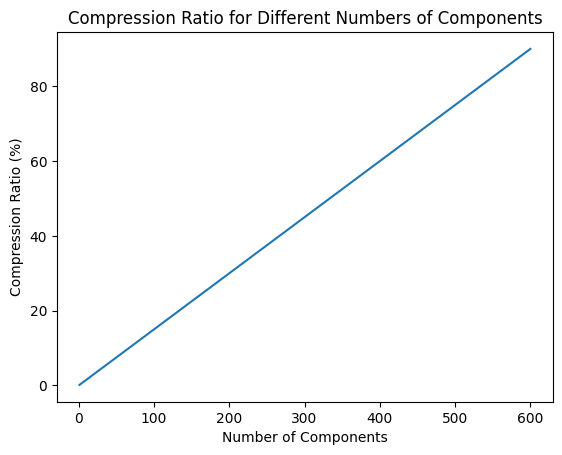

In [ ]:
# Calculate the compression ratio
original_data_size = image.size

# Initialize the compression ratios list
compression_ratios = []

num_components_vec = list(range(1, 601))

# Calculate the compression ratio for each number of components
for n in range(1,num_components+1):
    
    # Calculate the compressed data size
    compressed_data_size = n*image.shape[1]
    
    # Calculate the compression ratio
    compression_ratio = compressed_data_size / original_data_size
    
    # Append the compression ratio to the list
    compression_ratios.append(compression_ratio*100)

# Plot the compression ratios
plt.plot(num_components_vec, compression_ratios)
plt.xlabel('Number of Components')
plt.ylabel('Compression Ratio (%)')
plt.title('Compression Ratio for Different Numbers of Components')
plt.show()

Now lets relate the compression ratio with explained variance. 

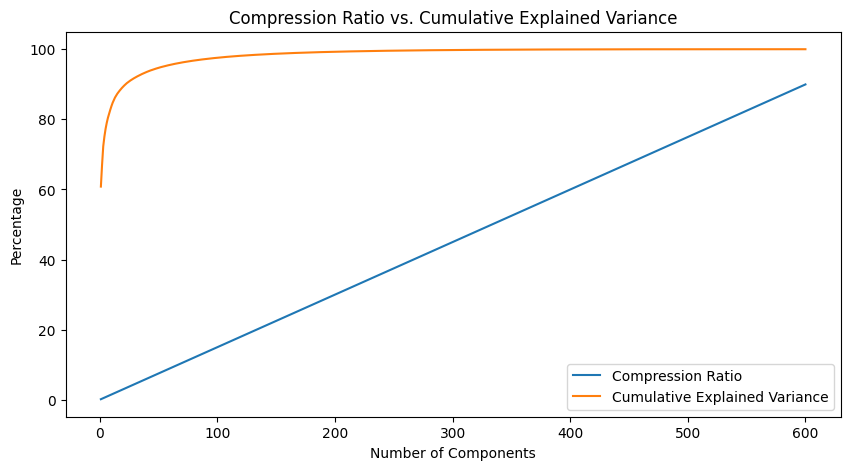

 PCs  Variance Explained (%)  Actual Explained Variance (%)  Compression Ratio
   7                    80.0                      80.447335           0.010495
  22                    90.0                      90.006915           0.032984
  54                    95.0                      95.063688           0.080960
 172                    99.0                      99.004450           0.257871
 364                    99.9                      99.900987           0.545727


In [ ]:
# Initialize the compression ratios and cumulative variances lists
compression_ratios = []
cumulative_variances = []

num_components_vec = list(range(1, 601))

# Calculate the compression ratio and cumulative variance for each number of components
for n in num_components_vec:
    # Calculate the compressed data size
    compressed_data_size = n * image.shape[1]
    # Calculate the compression ratio
    compression_ratio = compressed_data_size / original_data_size * 100
    compression_ratios.append(compression_ratio)
    
    # Calculate the cumulative explained variance
    cumulative_variance = np.sum(pca.explained_variance_ratio_[:n]) * 100
    cumulative_variances.append(cumulative_variance)

# Plot the compression ratios
plt.figure(figsize=(10, 5))
plt.plot(num_components_vec, compression_ratios, label='Compression Ratio')
plt.plot(num_components_vec, cumulative_variances, label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Percentage')
plt.title('Compression Ratio vs. Cumulative Explained Variance')
plt.legend()
plt.show()

# Initialize the variance explained levels
variance_levels = [80, 90, 95, 99, 99.9] # we want to find number of PCs that are close to these levels

# Initialize the compression ratios list
compression_ratios = []
# Initialize list of number of components that explain the variance
comps = []
# Initialize the list for actually explained variance
explained_variance = []

# Calculate the compression ratio for each variance explained level
for level in variance_levels:
    # Find the number of components that explain the specified variance level
    num_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= level / 100) + 1
    comps.append(num_components)

    # Calculate the actual explained variance for the number of components
    actual_explained_variance = np.sum(pca.explained_variance_ratio_[:num_components]) * 100
    explained_variance.append(actual_explained_variance)

    # Calculate the compressed data size
    compressed_data_size = num_components * image.shape[1]
    
    # Calculate the compression ratio
    compression_ratio = compressed_data_size / original_data_size
    
    # Append the compression ratio to the list
    compression_ratios.append(compression_ratio)

# Create a DataFrame
data = {'PCs': comps, 
        'Variance Explained (%)': variance_levels,
        'Actual Explained Variance (%)': explained_variance,
        'Compression Ratio': compression_ratios}

df = pd.DataFrame(data)

print(df.to_string(index=False)) # display datatable in one line

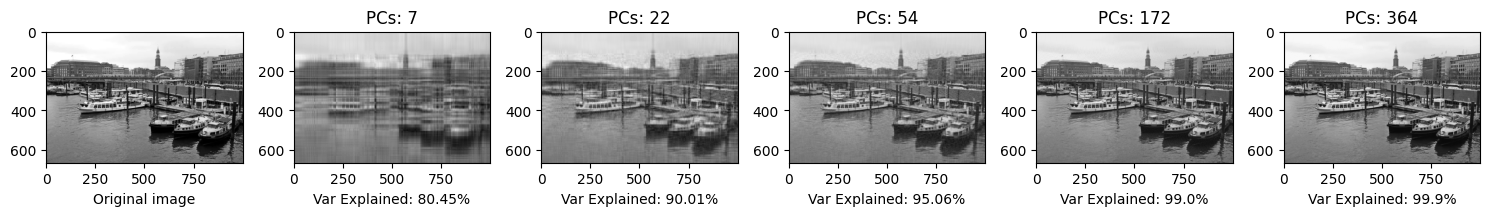

In [ ]:
# Create subplots with 2 rows and len(variance_levels) + 1 columns
fig, axes = plt.subplots(1, len(explained_variance) + 1, figsize=(15, 6))

# Plot the original image
axes[0].imshow(image, cmap='gray')
axes[0].set_xlabel("Original image")

for i, n_comp in enumerate(comps):
    # Perform PCA with the specified variance level
    pca = PCA(n_components=n_comp)
    image_compressed = pca.fit_transform(image)
    image_decompressed = pca.inverse_transform(image_compressed)

    # Plot the compressed image and reconstructed image in the corresponding subplots
    axes[i+1].imshow(image_decompressed, cmap='gray')
    axes[i+1].set_xlabel("Var Explained: {}%".format(explained_variance[i].round(2)))
    axes[i+1].set_title("PCs: {}".format(n_comp))

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()

<strong>Task</strong>: After going through the visualizations and looking at compression rations vs explained variance, think again about the following questions:
<ul><li> How any principal components are needed to efficiently compress the image?
<li>What do the principal components represent in the context of image compression?
<li>How can we interpret the principal components visually? Do they capture specific image features or patterns?
<li>Are the principal components directly related to image content or do they represent more abstract features? </ul>

## **[OPTIONAL] Part 4: Image Compression Unsing PCA of an image data set**

In many applications you will use PCA to compress a large data set of images. If you are interested in learning more about it, we recommend you to follow  [this tutorial](https://towardsdatascience.com/image-compression-using-principal-component-analysis-pca-253f26740a9f). Here, PCA is used to compress an image data set of handrwitten digits. 

<h2><i> Note the following differences between performing PCA on a single image vs on a data set of several images </i> 

Remember, that the input to Principal Component Analysis (PCA) is a dataset represented as a matrix, where each row corresponds to a separate sample ('n_samples') and each column represents a feature ('n_features') [link text](https:// [link text](https://))of that sample.

<h2>PCA on a Single Image:</h2>
<p>
  When applying Principal Component Analysis (PCA) to a single image, the image is treated as a matrix, with each row representing a separate sample ('n_samples') and each pixel in that row considered as a feature ('n_features'). PCA aims to find patterns of maximum variance across the rows of the image. The principal components obtained from PCA are linear combinations of the original features (pixels in a row). These principal components capture the most significant patterns or structures in the image, and the transformed data represents the projection of the original image onto these components.
</p>

<h2>PCA on a Dataset of Images:</h2>
<p>
  When applying PCA to a dataset of multiple images, each image is first flattened from a 2D array to a 1D array. Then, each flattened image is considered as a single sample in the dataset. For example, if we have a dataset of 1000 images, each of size (32, 32), we reshape each image into a (1024,) array, resulting in a (1000, 1024) dataset.
</p>
<p>
  In this context, 'n_samples' refers to the number of images in the dataset, and 'n_features' represents the total number of pixels in each image. PCA is then applied to this dataset, seeking directions (principal components) in the high-dimensional image space along which the original images exhibit the most variation. The principal components extracted represent common patterns or features across the set of images. By analyzing the values of the principal components for a specific image, we can determine the extent to which that image displays the patterns encoded by those components.
</p>


## <center>Well done! Module 14 focused on improving your understanding of PCA by walking through compression of a single gray scale image. We explored the importance of singular values and principal components in understanding how PCA captures the most variance in image data. Visualizing these components deepens this understanding and builds your skills in using PCA for practical applications like reducing data size while maintaining quality.</center>


In [ ]:
# Your Own Code from folling the tutorial

### <center> You are an absolute Pro - well done! </center>